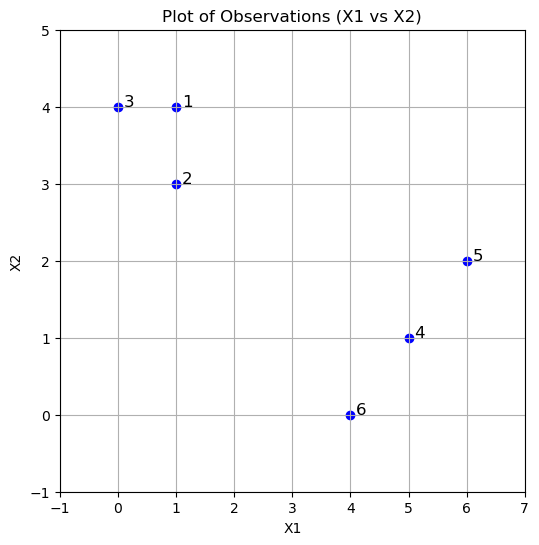

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Data points (observations)
X1 = [1, 1, 0, 5, 6, 4]  # Feature 1
X2 = [4, 3, 4, 1, 2, 0]  # Feature 2

# Plot the observations
plt.figure(figsize=(6, 6))
plt.scatter(X1, X2, color='blue')

# Annotate each point with its observation number
for i in range(len(X1)):
    plt.text(X1[i] + 0.1, X2[i], f'{i+1}', fontsize=12)

# Add title and labels
plt.title('Plot of Observations (X1 vs X2)')
plt.xlabel('X1')
plt.ylabel('X2')

# Display the plot
plt.grid(True)
plt.xlim(-1, 7)  # Adjust x-axis limits for better visibility
plt.ylim(-1, 5)  # Adjust y-axis limits for better visibility
plt.show()

In [5]:
import numpy as np

# Number of observations
n = 6

# Number of clusters (K = 2)
K = 2

# Randomly assign a cluster label (1 or 2) to each observation
cluster_labels = np.random.choice([1, 2], size=n)

# Report the cluster labels for each observation
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Cluster {label}")

Observation 1: Cluster 1
Observation 2: Cluster 2
Observation 3: Cluster 2
Observation 4: Cluster 1
Observation 5: Cluster 2
Observation 6: Cluster 1


In [18]:
# Data for the 6 observations (n=6, p=2)
data = np.array([[1, 4],  # Observation 1
                 [1, 3],  # Observation 2
                 [0, 4],  # Observation 3
                 [5, 1],  # Observation 4
                 [6, 2],  # Observation 5
                 [4, 0]]) # Observation 6

# Assume these are the randomly assigned cluster labels (can be obtained from the previous step)
# Replace this with actual labels if needed
cluster_labels = np.random.choice([1, 2], size=6)

# Separate data into two clusters
cluster_1_data = data[cluster_labels == 1]
cluster_2_data = data[cluster_labels == 2]

# Report the cluster labels for each observation
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Cluster {label}")

# Compute the centroid of each cluster (mean of X1 and X2)
centroid_1 = np.mean(cluster_1_data, axis=0) if len(cluster_1_data) > 0 else np.array([np.nan, np.nan])
centroid_2 = np.mean(cluster_2_data, axis=0) if len(cluster_2_data) > 0 else np.array([np.nan, np.nan])

# Report centroids
print(f"Cluster 1 centroid: {centroid_1}")
print(f"Cluster 2 centroid: {centroid_2}")

Observation 1: Cluster 1
Observation 2: Cluster 1
Observation 3: Cluster 2
Observation 4: Cluster 1
Observation 5: Cluster 2
Observation 6: Cluster 2
Cluster 1 centroid: [2.33333333 2.66666667]
Cluster 2 centroid: [3.33333333 2.        ]


In [34]:
import numpy as np
from scipy.spatial.distance import cdist

# Combine the centroids into a single array
centroids = np.vstack([centroid_1, centroid_2])

# Step 1: Compute the Euclidean distance between each observation and each centroid
distances = cdist(data, centroids, metric='euclidean')

# Step 2: Assign each observation to the nearest centroid (cluster)
# The closest centroid has the smallest distance, so we take the argmin across axis 1
cluster_labels = np.argmin(distances, axis=1) + 1  # Adding 1 to make cluster labels start at 1

print(distances)

# Step 3: Report the cluster labels for each observation
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Assigned to Cluster {label}")


[[1.88561808 3.07318149]
 [1.37436854 2.53859104]
 [2.68741925 3.88730126]
 [3.14466038 1.94365063]
 [3.72677996 2.66666667]
 [3.14466038 2.10818511]]
Observation 1: Assigned to Cluster 1
Observation 2: Assigned to Cluster 1
Observation 3: Assigned to Cluster 1
Observation 4: Assigned to Cluster 2
Observation 5: Assigned to Cluster 2
Observation 6: Assigned to Cluster 2


In [38]:
import numpy as np
from scipy.spatial.distance import cdist

# Data for the 6 observations (n=6, p=2)
data = np.array([[1, 4],  # Observation 1
                 [1, 3],  # Observation 2
                 [0, 4],  # Observation 3
                 [5, 1],  # Observation 4
                 [6, 2],  # Observation 5
                 [4, 0]]) # Observation 6

# Initialize random cluster labels
np.random.seed(0)  # For reproducibility
cluster_labels = np.random.choice([1, 2], size=6)

# Function to compute centroids
def compute_centroids(data, labels, K):
    centroids = np.array([data[labels == k].mean(axis=0) for k in range(1, K + 1)])
    return centroids

# K-means clustering until convergence
K = 2
centroids = compute_centroids(data, cluster_labels, K)

# Previous labels for comparison
previous_labels = np.zeros(cluster_labels.shape)

# Loop until cluster assignments stop changing
while not np.array_equal(previous_labels, cluster_labels):
    # Step 1: Assign each observation to the nearest centroid
    distances = cdist(data, centroids, metric='euclidean')
    previous_labels = cluster_labels.copy()  # Store the previous labels
    cluster_labels = np.argmin(distances, axis=1) + 1  # Assign clusters starting from 1

    # Step 2: Recompute centroids
    centroids = compute_centroids(data, cluster_labels, K)

# Report final cluster labels and centroids
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Assigned to Cluster {label}")

print("\nFinal Centroids:")
print(centroids)

Observation 1: Assigned to Cluster 2
Observation 2: Assigned to Cluster 2
Observation 3: Assigned to Cluster 2
Observation 4: Assigned to Cluster 1
Observation 5: Assigned to Cluster 1
Observation 6: Assigned to Cluster 1

Final Centroids:
[[5.         1.        ]
 [0.66666667 3.66666667]]


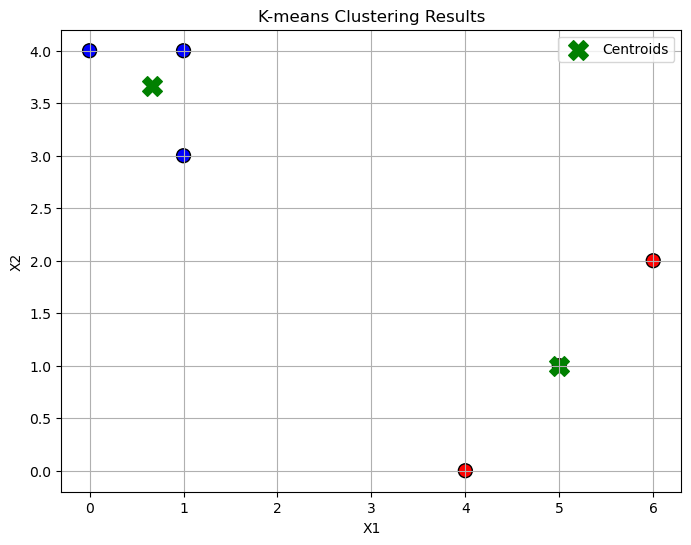

Observation 1: Assigned to Cluster 2
Observation 2: Assigned to Cluster 2
Observation 3: Assigned to Cluster 2
Observation 4: Assigned to Cluster 1
Observation 5: Assigned to Cluster 1
Observation 6: Assigned to Cluster 1

Final Centroids:
[[5.         1.        ]
 [0.66666667 3.66666667]]


In [40]:
# Plotting
plt.figure(figsize=(8, 6))
colors = ['red' if label == 1 else 'blue' for label in cluster_labels]  # Color scheme

# Scatter plot of the observations colored by cluster labels
plt.scatter(data[:, 0], data[:, 1], c=colors, s=100, edgecolor='k')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='X', s=200, label='Centroids')

# Adding labels and title
plt.title('K-means Clustering Results')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()

# Reporting final cluster labels
for i, label in enumerate(cluster_labels, start=1):
    print(f"Observation {i}: Assigned to Cluster {label}")

print("\nFinal Centroids:")
print(centroids)